# Game Risk
***

This notebook simulates 1000 individual battle rounds in the board game **Risk**, specifically the scenario where 3 attackers face 2 defenders. Each battle round represents a single roll of the dice for both sides, and the results of these rounds are analyzed and plotted. 

The aim is to observe the outcomes of these battle rounds and visualize the results in a meaningful way, shedding light on the probabilities of different outcomes in this specific scenario.

## Rules of Risk

The following rules govern each battle round:
- The attacker rolls up to **3 dice**, representing 3 troops.
- The defender rolls up to **2 dice**, representing 2 troops.
- The dice are sorted in descending order, and the results are compared as follows:
  1. The highest attack die is compared to the highest defense die. If the attacker's die is greater, the defender loses one troop. Otherwise, the attacker loses one troop.
  2. The second-highest attack die is compared to the second-highest defense die (if applicable), following the same rule.
- Troop losses are recorded based on these comparisons, with the possible outcomes being:
  - **Attacker looses 2:** The attacker looses both comparisons.
  - **Defender looses 2:** The defender looses both comparisons.
  - **Each looses 1:** Both sides looses one comparison.

## Importing Libraries

We use `numpy` for simulating dice rolls and `matplotlib` for plotting the results [[34]](#34) [[7]](#7).

In [1]:
# Import numpy and matplotlib

import numpy as np


import matplotlib.pyplot as plt

## Defining a Single Battle Round

This function simulates a single battle round between 3 attackers and 2 defenders. It rolls and sorts the dice for both sides and determines the troop losses for each side.

The `battle()` function simulates a single combat round in the Risk game. The attacker rolls three dice and the defender rolls two (random intergers), with both sets sorted in descending order [[35]](#35) [[36]](#36). The highest dice from each side are compared, followed by the second-highest, to determine troop losses for each side. 

In [3]:
def battle():
    # Attacker rolls 3 dice
    attackerdice = np.sort(np.random.randint(1, 7, 3))[::-1]
    # Defender rolls 2 dice
    defenderdice = np.sort(np.random.randint(1, 7, 2))[::-1]

    # Initialize losses
    attacker_loose = 0
    defender_loose = 0

    # Compare top dice
    if attackerdice[0] > defenderdice[0]:
        defender_loose += 1
    else:
        attacker_loose += 1

    # Compare second-highest dice
    if attackerdice[1] > defenderdice[1]:
        defender_loose += 1
    else:
        attacker_loose += 1

    return attacker_loose, defender_loose

## Simulating 1000 Battle Rounds

This function runs the simulation for a specified number of battle rounds (default: 1000) and records the results.

The `total_battles` function simulates 1000 battle rounds. It initializes a results dictionary to track the outcome of each round: whether the attacker loses 2, the defender loses 2, or each loses 1. 

For each battle, it calls the `battle()` function, which returns the number of troops lost by both the attacker and the defender. Based on the result of each round, the function updates the corresponding count in the `results` dictionary. After simulating all rounds, it returns the final results.

In [23]:
def total_battles(rounds=1000):
    # Initialize results dictionary
    results = {"Attacker looses 2": 0, "Each looses 1": 0, "Defender looses 2": 0}

    for i in range(rounds):
        # Perform a single battle
        attacker_loose, defender_loose = battle()

        # Update results based on outcome
        if attacker_loose == 2:
            results["Attacker looses 2"] += 1
        elif defender_loose == 2:
            results["Defender looses 2"] += 1
        else:
            results["Each looses 1"] += 1

    return results

## Running the Simulation

We simulate 1000 battle rounds and store the outcomes.

In [25]:
results = total_battles()

## Visualizing the Results

This section plots the results as a bar chart. Each bar represents the frequency of a specific outcome, making it easy to interpret the probabilities of different results.

The `plt.figure()` function sets the size of the plot, while `plt.bar()` generates the bars using the keys and values from the `results` dictionary, which represent the battle outcomes and their respective frequencies [[37]](#37) [[38]](#38). Each bar is colored differently for clarity, and the heights of the bars correspond to the frequency of each outcome (attacker loses 2, defender loses 2, or each loses 1) [[38]](#38). 

The loop iterates through each bar to add the corresponding frequency value as a label on top of each bar using `plt.text()` [[39]](#39). The `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` functions add descriptive labels to the chart, providing context about the data being displayed [[39]](#39). Finally, `plt.show()` renders the plot, displaying it with all the customizations.

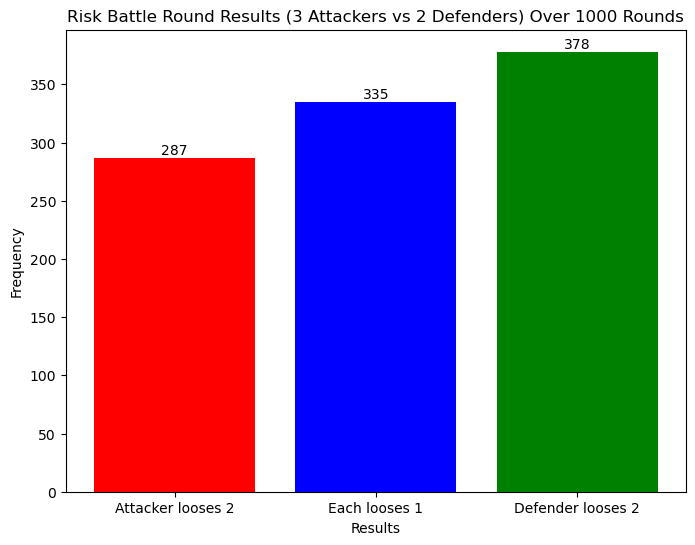

In [26]:
# Plotting the results
plt.figure(figsize=(8, 6))
bars = plt.bar(results.keys(), results.values(), color=['red', 'blue', 'green'])
# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')  # va='bottom' positions the text above the bar
plt.title("Risk Battle Round Results (3 Attackers vs 2 Defenders) Over 1000 Rounds")
plt.xlabel("Results")
plt.ylabel("Frequency")
plt.show()

## Simulating Full Battles in Risk


In this section, we define a function that simulates a full battle between two armies, with the battle continuing until one side loses all of its troops. The simulation follows the standard Risk battle rules, where the attacker can roll up to 3 dice and the defender can roll up to 2, depending on the number of troops remaining. After each round, the dice rolls are compared to determine the troop losses for both sides. This process is repeated iteratively until one army is completely wiped out, and the winner is determined based on which side has remaining troops.

The simulation can be customized by adjusting the initial troop sizes for both the attacker and defender. This flexibility allows for the exploration of different battle scenarios. In addition, the full battle simulation can be run multiple times to capture a variety of outcomes, providing a deeper understanding of how different army sizes influence the results of the battle. By running these simulations and visualizing the results, we can gain insights into the probabilistic nature of battles in Risk and make informed decisions based on the outcomes.

### Defining a Full Battle Simulation

The `full_battle` function simulates a complete battle between two armies, where the attacker and defender engage in multiple rounds until one side is completely wiped out. The attacker rolls up to 3 dice, and the defender rolls up to 2 dice, based on the number of troops each side has remaining. In each round, the dice rolls are compared, and the side with the higher die loses one troop. The process repeats until either the attacker or defender has no troops left. The function returns the outcome of the battle, either "Attacker Wins" or "Defender Wins", depending on which side remains [[35]](#35) [[36]](#36).

In [14]:
def full_battle(attacker_size, defender_size):
    # Initialize army sizes
    attacker_troops = attacker_size
    defender_troops = defender_size

    # Simulate rounds until one side is wiped out
    while attacker_troops > 0 and defender_troops > 0:
        # Attacker uses up to 3 dice, defender uses up to 2 dice
        attackerdice = np.sort(np.random.randint(1, 7, min(3, attacker_troops)))[::-1]
        defenderdice = np.sort(np.random.randint(1, 7, min(2, defender_troops)))[::-1]

        # Compare dice to determine troop losses
        for i in range(min(len(attackerdice), len(defenderdice))):
            if attackerdice[i] > defenderdice[i]:
                defender_troops -= 1
            else:
                attacker_troops -= 1

    # Return the outcome
    return "Attacker Wins" if defender_troops == 0 else "Defender Wins"

### Simulating Multiple Full Battles

The `simulate_battles` function runs multiple simulations of battles between two armies with specified sizes. It accepts three parameters: `num_battles` (the number of battles to simulate), `attacker_size` (the number of troops in the attacker's army), and `defender_size` (the number of troops in the defender's army). For each battle, the function calls the `full_battle` function, which determines the outcome of a single battle. The results of all battles are tracked in a dictionary (`results`), which counts how many times the attacker or defender wins. After all battles are simulated, the function returns the dictionary with the final win counts for each side.

In [15]:
def simulate_battles(num_battles, attacker_size, defender_size):
    results = {"Attacker Wins": 0, "Defender Wins": 0}

    for _ in range(num_battles):
        result = full_battle(attacker_size, defender_size)
        results[result] += 1

    return results

### Running the Simulation

In this code, the parameters for the simulation are set as follows: `num_battles` is set to 10,000, meaning 10,000 full battles will be simulated; `attacker_size` and `defender_size` are both set to 15, indicating that both the attacker and the defender will start with 15 troops. 

The `simulate_battles` function is then called with these parameters to run the simulation. The results of the 10,000 battles will be stored in the `results` variable, which contains the count of how many times the attacker or the defender wins across all simulated battles.

In [31]:
# Parameters for the simulation
num_battles = 10000
attacker_size = 15
defender_size = 15

# Run the simulation
results = simulate_battles(num_battles, attacker_size, defender_size)

### Visualizing the Results

The results of the battle simulation are visualized using a bar chart. The plt.figure(figsize=(8, 6)) sets the size of the figure [[37]](#37). Then, the plt.bar(results.keys(), results.values(), color=['red', 'blue']) creates a bar chart where the x-axis represents the battle outcomes ("Attacker Wins" and "Defender Wins") and the y-axis represents the frequency of each outcome [[38]](#38).

Next, the for loop iterates over the bars in the chart to add the value (frequency) of each outcome as a label at the top of each bar, ensuring that the text is placed above the bar (va='bottom') [[39]](#39). Finally, titles and labels are added to the chart: the title indicates the specifics of the simulation (the number of attackers and defenders), while the x-axis and y-axis are labeled as "Battle Outcomes" and "Frequency", respectively [[39]](#39). The plt.show() command displays the chart to the user.

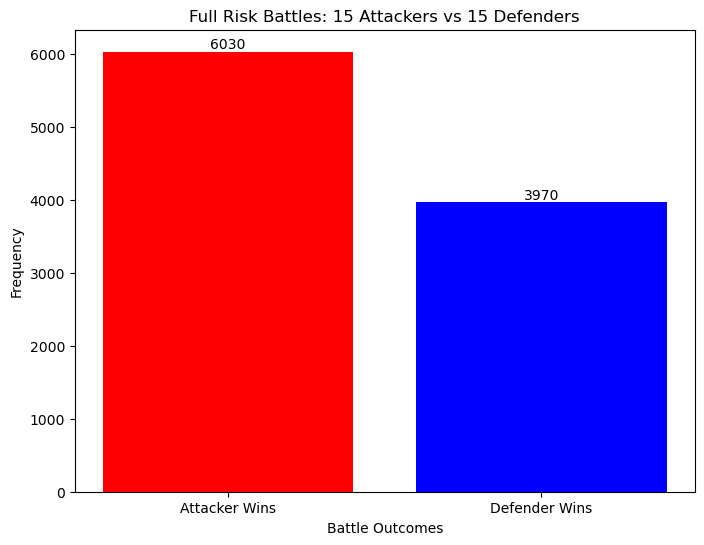

In [32]:
# Plotting the results
plt.figure(figsize=(8, 6))
bars = plt.bar(results.keys(), results.values(), color=['red', 'blue'])

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

# Adding chart titles and labels
plt.title(f"Full Risk Battles: {attacker_size} Attackers vs {defender_size} Defenders")
plt.xlabel("Battle Outcomes")
plt.ylabel("Frequency")
plt.show()

### Additional Visualization: Number of Troops Remaining

To gain further insights, we can modify the simulation to track the number of troops remaining for the winner.

This script extends the battle simulation to track the number of remaining troops for the winner of each battle. The full_battle_with_troops() function simulates an entire battle between two armies, reducing troop counts based on dice rolls and continuing until one side loses all its troops. In addition to determining the winner, it returns the number of remaining troops for the victorious side [[37]](#37) [[38]](#38) [[40]](#40) [[41]](#41).

The simulate_battles_with_troops() function runs multiple battles, collects the results of each (including the winner and the remaining troops), and stores them in a dictionary [[42]](#42). This extended simulation allows for a deeper analysis of how many troops are typically left for the winner across a series of battles, providing insights into the dynamics of the game.

In [33]:
def full_battle_with_troops(attacker_size, defender_size):
    attacker_troops = attacker_size
    defender_troops = defender_size

    while attacker_troops > 0 and defender_troops > 0:
        attackerdice = np.sort(np.random.randint(1, 7, min(3, attacker_troops)))[::-1]
        defenderdice = np.sort(np.random.randint(1, 7, min(2, defender_troops)))[::-1]

        for i in range(min(len(attackerdice), len(defenderdice))):
            if attackerdice[i] > defenderdice[i]:
                defender_troops -= 1
            else:
                attacker_troops -= 1

    # Return winner and troops remaining
    if defender_troops == 0:
        return "Attacker Wins", attacker_troops
    else:
        return "Defender Wins", defender_troops

# Extended simulation to track remaining troops
def simulate_battles_with_troops(num_battles, attacker_size, defender_size):
    results = {"Attacker Wins": [], "Defender Wins": []}

    for _ in range(num_battles):
        winner, remaining_troops = full_battle_with_troops(attacker_size, defender_size)
        results[winner].append(remaining_troops)

    return results

# Run the extended simulation
detailed_results = simulate_battles_with_troops(num_battles, attacker_size, defender_size)

### Visualizing Remaining Troops

In this section we generate two histograms to visualize the distribution of remaining troops for both the attacker and defender after multiple simulated battles. The first subplot displays the distribution of remaining troops for the attacker when they win, while the second subplot shows the distribution of remaining troops for the defender when they win. 

The `plt.hist()` function is used to create the histograms, with the `bins` parameter defining the number of intervals based on the starting troop sizes [[43]](#43). The `color` parameter sets the bars' colors (red for attacker wins, blue for defender wins), and `edgecolor` adds a border around the bars [[43]](#43) [[44]](#44). The `plt.tight_layout()` function ensures that the subplots are spaced appropriately for better readability, and `plt.show()` displays the final plot [[45]](#45).

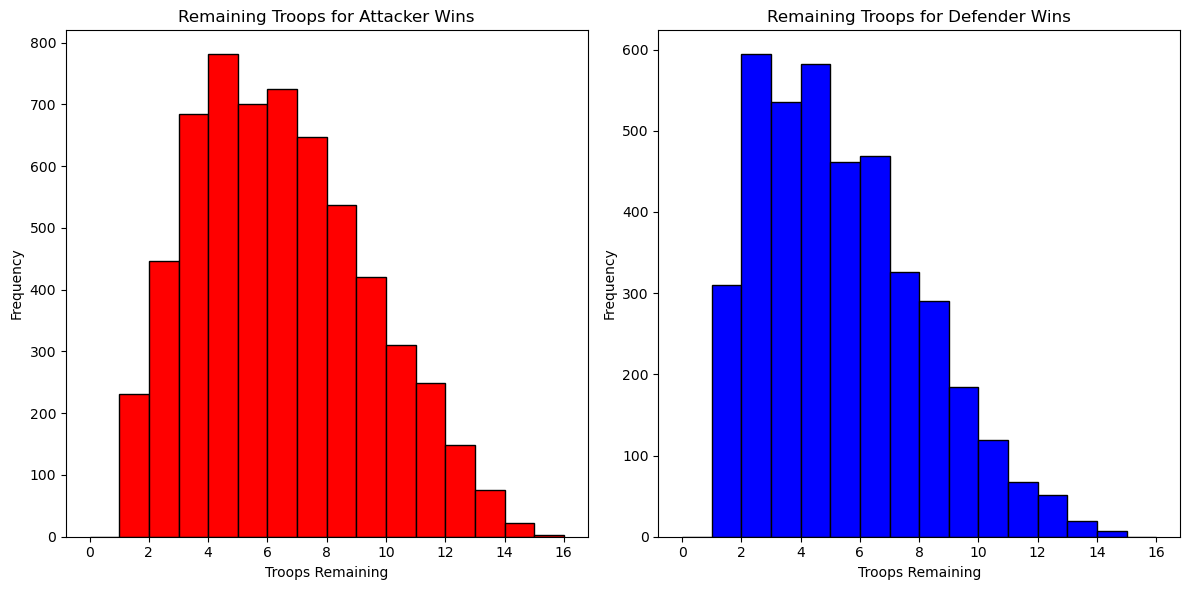

In [34]:
# Plot remaining troops distributions
plt.figure(figsize=(12, 6))

# Plot attacker wins
plt.subplot(1, 2, 1)
plt.hist(detailed_results["Attacker Wins"], bins=range(0, attacker_size + 2), color='red', edgecolor='black')
plt.title("Remaining Troops for Attacker Wins")
plt.xlabel("Troops Remaining")
plt.ylabel("Frequency")

# Plot defender wins
plt.subplot(1, 2, 2)
plt.hist(detailed_results["Defender Wins"], bins=range(0, defender_size + 2), color='blue', edgecolor='black')
plt.title("Remaining Troops for Defender Wins")
plt.xlabel("Troops Remaining")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Conclusion

This extended simulation models entire battles instead of single rounds, providing deeper insights into how troop sizes influence the outcomes. The additional visualization of remaining troops offers a granular view of how decisive each victory tends to be. By adjusting the starting troop sizes and running multiple simulations, you can explore various strategic scenarios in the game Risk.

***
# End